# Introduction

Copyright 2022 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM(TM) is a trademark of Moran Innovation LLC. All rights reserved.

**HOW TO USE THIS INTERACTIVE NOTEBOOK: Use the table of contents icon and sidebar at the left to navigate to the topic of interest. Change any of the input values and run the associated cell code.**

**CAUTION: None of the code cells run automatically. The user must manually run selected code cells in sequence to achieve the desired results. Default units are SI.**

**The reference report for this interactive notebook can be found at: https://drive.google.com/file/d/1sTNNPRgGdC4JrDt5UGz7pkyhoysBNkRZ/view.** 

**Please report any errata or other feedback to info@moraninnovation.com.**

## CryoFM

CryoFM is a library of functions useful for cryogenic fluid management. To access CryoFM from this notebook, use the `import CryoFM` command. Use the `dir(CryoFM)` command to get a list of the library functions.

In [17]:
import CryoFM

dir(CryoFM)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'bond',
 'grashof',
 'reynolds']

For help on a particular function, use the `help(CryoFM.function)` command. Note that help can also be used for the entire CryoFM library but results in a very long text output.

In [2]:
import CryoFM

help(CryoFM.reynolds)

Help on function reynolds in module CryoFM:

reynolds(velocity, dim_char, density, visc_dyn)
    Reynolds number (ratio of inertia to viscous forces in a flowing fluid)
    
    Keyword arguments:
    velocity -- fluid velocity, m/s
    dim_char -- characteristic dimension, m
                distance from leading edge for external flow, or
                hydraulic diameter for internal flow (4*area/wetted perimeter)
    density -- fluid density, kg/m^3
    visc_dyn -- dynamic viscosity, Pa-s



CryoFM functions are invoked using `CryoFM.function(arguments)`. The arguments can be passed in order, or using the argument keywords in any order. An example:

In [3]:
import CryoFM

reynolds = CryoFM.reynolds(velocity=10, dim_char=0.1, density=1106.63, 
                           visc_dyn=1.6388e-4)
print("Reynolds number =", "{:.5e}".format(reynolds))

Reynolds number = 6.75268e+06


## Fluid Properties

The pressure versus temperature saturation curve along with key thermodynamic values for hydrogen, methane, and oxygen are shown below.

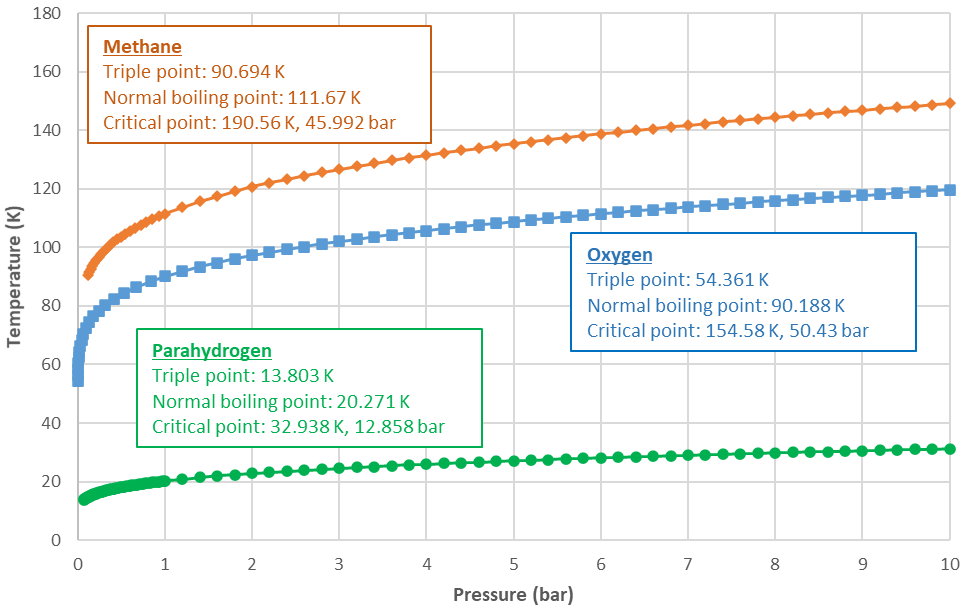

### CoolProp Lists

The open source CoolProp software is used in CryoFM for fluid properties evaluation. All units are SI. Details on the fluids and properties supported by CoolProp can be found at the links below.

* Fluids list: http://coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids

* Properties list: http://www.coolprop.org/coolprop/HighLevelAPI.html#table-of-string-inputs-to-propssi-function

First use the `import CoolProp.CoolProp as cp` command. Fluid properties can then be evaluated using `cp.PropsSI(arguments)` where the arguments in order are:
* property name
* first state point name
* first state point value
* second state point name
* second state point value
* fluid name

The phase can also be provided using `cp.PhaseSI(arguments)` where the arguments in order are:
* first state point name
* first state point value
* second state point name
* second state point value
* fluid name

Note that CoolProp does not provide transport properties for some fluids (e.g., viscosity, conductivity, etc.)

### Saturation Conditions

Some saturated properties evaluated using CoolProp calls are shown below for reference.

In [4]:
import CoolProp.CoolProp as cp # for evaluating fluid thermophysical properties

# Saturation condition
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html
pressure = 2e5   # Pa, pressure

# Properties
density_liquid = cp.PropsSI('D', 'P', pressure, 'Q', 0, fluid) # kg/m^3 
density_vapor = cp.PropsSI('D', 'P', pressure, 'Q', 1, fluid) # kg/m^3
enthalpy_liq = cp.PropsSI('H', 'P', pressure, 'Q', 0, fluid) # J/kg
enthalpy_vap = cp.PropsSI('H', 'P', pressure, 'Q', 1, fluid) # J/kg
latent_heat = enthalpy_vap - enthalpy_liq # J/kg
surf_tens = cp.PropsSI('surface_tension', 'P', pressure, 'Q', 0, fluid) # N/m
temp_sat = cp.PropsSI('T', 'P', pressure, 'Q', 0, fluid) # K

# Results
results = {"temp_sat": temp_sat, "density_liquid": density_liquid, 
           "density_vapor": density_vapor, "enthalpy_liq": enthalpy_liq, 
           "enthalpy_vap": enthalpy_vap, "latent_heat": latent_heat, 
           "surf_tension": surf_tens,}
print(results)

{'temp_sat': 97.23553533356629, 'density_liquid': 1105.401189711224, 'density_vapor': 8.354467802255993, 'enthalpy_liq': -121260.08808900896, 'enthalpy_vap': 84481.32335583193, 'latent_heat': 205741.4114448409, 'surf_tension': 0.011405531150268775}


### Specific State Points

Some state point properties evaluated using CoolProp calls are shown below for reference.

In [5]:
import CoolProp.CoolProp as cp # for evaluating fluid thermophysical properties

# State points
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html
temp = 97        # K, temperature
pressure = 2e5   # Pa, pressure

# Properties
cond = cp.PropsSI('conductivity', 'T', temp, 'P', pressure, fluid) # W/m-K
density = cp.PropsSI('D', 'T', temp, 'P', pressure, fluid)  # kg/m^3
phase = cp.PhaseSI('T', temp, 'P', pressure, fluid)  # based on state points
prandtl = cp.PropsSI('Prandtl', 'T', temp, 'P', pressure, fluid)  # Prandtl no.
visc_dynamic = cp.PropsSI('V', 'T', temp, 'P', pressure, fluid)  # Pa-s

# Results
results = {"phase": phase, "density": density, "visc_dynamic": visc_dynamic, 
           "prandtl": prandtl}
print(results)

{'phase': 'liquid', 'density': 1106.6351294355363, 'visc_dynamic': 0.0001638895690225786, 'prandtl': 2.004098847592044}


## Dimensionless Numbers

Dimensionless numbers are used for heat transfer and fluid dynamic analysis. Here are the dimensionless numbers available from the CryoFM library:

### Reynolds Number

The Reynolds number (Re) is the ratio of inertia to viscous forces in a flowing fluid, and is given by:

$$
Re=\frac{uL}{υ}=\frac{ρuL}{μ}
$$

Where (u) is flow speed, (L) is characteristic length, (υ) is kinematic viscosity, (ρ) is fluid density, and (μ) is dynamic viscosity. The characteristic length for internal flow is hydraulic diameter and is defined as four times the crossectional area divided by the perimeter (equivalent to the diameter for a round pipe). Subscripts applied to Re indicate internal flow based on hydraulic diameter (D) or external flow at a distance (x) from the leading edge.

Reynolds number characterizes flow regimes in internal or external flow configurations and is useful for: determining the onset of turbulence; calculating pressure drop in piping; and dynamic similitude scaling for prototype tests. The flow regimes are:
* Laminar (approximately ReD < 2300 for pipe flow)
* Transitional (approximately 2300 < ReD < 2900 for pipe flow)
* Turbulent (approximately ReD > 2900 for pipe flow; Rex > 500,000 for flow over flat plate)



In [7]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
length = 0.1     # m, characteristic length or hydraulic diameter (4*A/Pwetted)
velocity = 10    # m/s, fluid velocity
temp = 97        # K, bulk fluid temperature
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
dens = cp.PropsSI('D', 'T', temp, 'P', press, fluid)  # kg/m^3
visc_dyn = cp.PropsSI('V', 'T', temp, 'P', press, fluid)  # Pa-s

# Reynolds number
reynolds = CryoFM.reynolds(velocity, length, dens, visc_dyn)
print("Reynolds number =", "{:.5e}".format(reynolds))

Reynolds number = 6.75232e+06


### Bond Number

The Bond number (Bo) is the ratio of acceleration to capillary forces and is given by:

$$
Bo=\frac{(ρ_l-ρ_v) \bar{a} {L}^2}{σ}
$$

Where $(ρ_l-ρ_v )$ is the density difference between the liquid and vapor phases, $(\bar{a})$ is the local acceleration, $(L)$ is the characteristic dimension (e.g. liquid free surface radius), and (σ) is surface tension. Bond number provides characterization of the fluid free surface shape and can be used to calculate the propulsive force needed to settle the fluid in a reduced gravity environment.

In [4]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
accel = 9.81e-6  # m/s^2, local acceleration at the interface
radius_fs = 3.3    # m, free surface diameter at the interface
press = 2e5      # Pa, saturation pressure at the interface
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
dens_liq = cp.PropsSI('D', 'P', press, 'Q', 0, fluid)  # kg/m^3
dens_vap = cp.PropsSI('D', 'P', press, 'Q', 1, fluid)  # kg/m^3
surf_tens = cp.PropsSI('surface_tension', 'P', press, 'Q', 0, fluid)  # N/m

# Bond number
bond = CryoFM.bond(accel, radius_fs, dens_liq, dens_vap, surf_tens)
print("Bond number =", round(bond,1))

Bond number = 10.3


### Prandtl Number

The Prandtl number (Pr) is the ratio of momentum diffusivity to thermal diffusivity and is equal to the specific heat capacity times the dynamic viscosity divided by the thermal conductivity. It can also be evaluated directly as a fluid property as shown below.

In [1]:
import CoolProp.CoolProp as cp

# Inputs
temp = 97.24     # K, bulk fluid temperature
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Prandtl number
prandtl = cp.PropsSI('Prandtl', 'T', temp, 'P', press, fluid)
print("Prandtl number =", round(prandtl,2))

Prandtl number = 0.83


### Grashof Number

The Grashof number (Gr) is the ratio of the buoyancy to viscous force acting on a fluid. It is given by:

$$
Gr=\frac{gβ|T_s-T_∞|D^3}{v^2}
$$

Temperature-dependent fluid properties for calculating Gr are thermal expansion coefficient (β) and kinematic viscosity (v).


In [9]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
accel = 9.81e-6   # m/s^2, local acceleration
temp_surf = 55    # K, surface temperature
temp_bulk = 97.24 # K, bulk fluid temperature
dim_char = 6.6   # m, characteristic length or hydraulic diameter (4*A/Pwetted)
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
temp_avg = (temp_surf + temp_bulk)/2
cte = cp.PropsSI('isobaric_expansion_coefficient', 'T', temp_avg, 'P', press, 
                 fluid) # 1/K
visc_dyn = cp.PropsSI('V', 'T', temp_avg, 'P', press, fluid)  # Pa-s
dens = cp.PropsSI('D', 'T', temp_avg, 'P', press, fluid)  # kg/m^3
visc_kin = visc_dyn / dens # kg/m^3

# Grashof number
grashof = CryoFM.grashof(accel, cte, temp_surf, temp_bulk, dim_char, visc_kin)
print("Grashof number =", "{:.5e}".format(grashof))

Grashof number = 7.59314e+09


### Raleigh Number

The Raleigh number (Ra) is the ratio of the time scale for diffusive thermal transport to the time scale for convective thermal transport. It is used to characterize the regime of buoyancy-driven convection flow, and is defined as:

$$
Ra=Gr∙Pr=\frac{gβ|T_s-T_∞ | D^3}{να}
$$

Temperature-dependent fluid properties for calculating Ra are thermal expansion coefficient (β), kinematic viscosity (ν), and thermal diffusivity (α). The magnitude of Ra varies proportionally with the driving temperature differential (Ts - T∞), g-level (g), and the cube of the characteristic length (D). High values of Ra correspond to turbulent convection flow; low values indicate stagnant flow (conduction dominant); and intermediate values are in the laminar regime.

In [10]:
import CoolProp.CoolProp as cp
import CryoFM

# Inputs
accel = 9.81e-6   # m/s^2, local acceleration
temp_surf = 55    # K, surface temperature
temp_bulk = 97.24 # K, bulk fluid temperature
dim_char = 6.6   # m, characteristic length or hydraulic diameter (4*A/Pwetted)
press = 2e5      # Pa, dynamic pressure
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
temp_avg = (temp_surf + temp_bulk)/2 # K, mean temperature of surface and bulk
cte = cp.PropsSI('isobaric_expansion_coefficient', 'T', temp_avg, 'P', press, 
                 fluid) # 1/K
visc_dyn = cp.PropsSI('V', 'T', temp_avg, 'P', press, fluid)  # Pa-s
dens = cp.PropsSI('D', 'T', temp_avg, 'P', press, fluid)  # kg/m^3
visc_kin = visc_dyn / dens # kg/m^3
prandtl = cp.PropsSI('Prandtl', 'T', temp_avg, 'P', press, fluid)

# Raleigh number
grashof = CryoFM.grashof(accel, cte, temp_surf, temp_bulk, dim_char, visc_kin)
raleigh = grashof * prandtl
print("Raleigh number =", "{:.5e}".format(raleigh))

Raleigh number = 2.21533e+10


### Nusselt Number

The convective heat transfer coefficient (h) can be found from empirically derived correlations for the Nusselt number (Nu) that are a function of the Raleigh number. For natural convection, these correlations generally take the form:

$$
Nu=\frac{hL}{k}=C(Ra)^x
$$

Where (h) is the convective heat transfer coefficient, (L) is the characteristic length, (k) is the fluid thermal conductivity, and (C) and (x) are empirically fitted coefficients that are correlated to specific geometries and conditions.

In [19]:
import CoolProp.CoolProp as cp

# Nusselt number correlations have been developed for a variety of conditions
# A correlation for natural convection within a sphere in low gravity is used
# as an example here: Nu = C(Ra)^x = hL/k (Ref: Mattor, et al., AIAA 92-0603)

# Inputs 
L = 6.6    # m, internal diameter of the sphere
C = 1.158     # emperically derived coefficient C
x = 0.210     # emperically derived coefficient x
Ra = 2.215e10 # Raleigh number
temp = 76.12  # K, mean temperature of surface and bulk
press = 2e5   # Pa, pressure
fluid = 'Oxygen' # http://www.coolprop.org/fluid_properties/PurePseudoPure.html

# Fluid properties
cond = cp.PropsSI('conductivity', 'T', temp, 'P', press, fluid) # W/m-K

# Nusselt number and convective heat transfer coefficient
nusselt = C * Ra**x
ht_coeff = nusselt * cond / L
print("Nusselt number =", round(nusselt,1), ", heat transfer coefficient =", 
      round(ht_coeff, 2), "W/m^2-K")

Nusselt number = 172.3 , heat transfer coefficient = 4.47 W/m^2-K


## Calculation Examples

### Vaporization Rate

**Vaporization rate as a function of heat load for a vented tank**

Consider a spherical liquid oxygen tank in low earth orbit that has a diameter of 6.6 m. It is venting at a constant controlled tank pressure of 2 bar and experiencing an acceleration field of 10e-6 g (or 9.81e-6 m/s^2). Assuming the bulk liquid is saturated at the tank pressure condition, determine the appropriate thermophysical properties. What is the
vaporization rate per watt of heat leak if the tank is continuously venting at 2 bar?

In [12]:
import CoolProp.CoolProp as cp

# Latent heat of vaporization
enthalpy_liq = cp.PropsSI('H', 'P', 2e5, 'Q', 0, 'Oxygen') # J/kg
enthalpy_vap = cp.PropsSI('H', 'P', 2e5, 'Q', 1, 'Oxygen') # J/kg
latent_heat = enthalpy_vap - enthalpy_liq # J/kg

# Vaporization rate per watt of heat leak
vaporiz_rate = 1 / latent_heat * 1000 * 3600 # kg/hr
print("Vaporization rate =", round(vaporiz_rate,1), "kg/hr")

Vaporization rate = 17.5 kg/hr



Vaporization rates at other saturation pressures and for other fluids can be calculated, plotted, and curve fit:

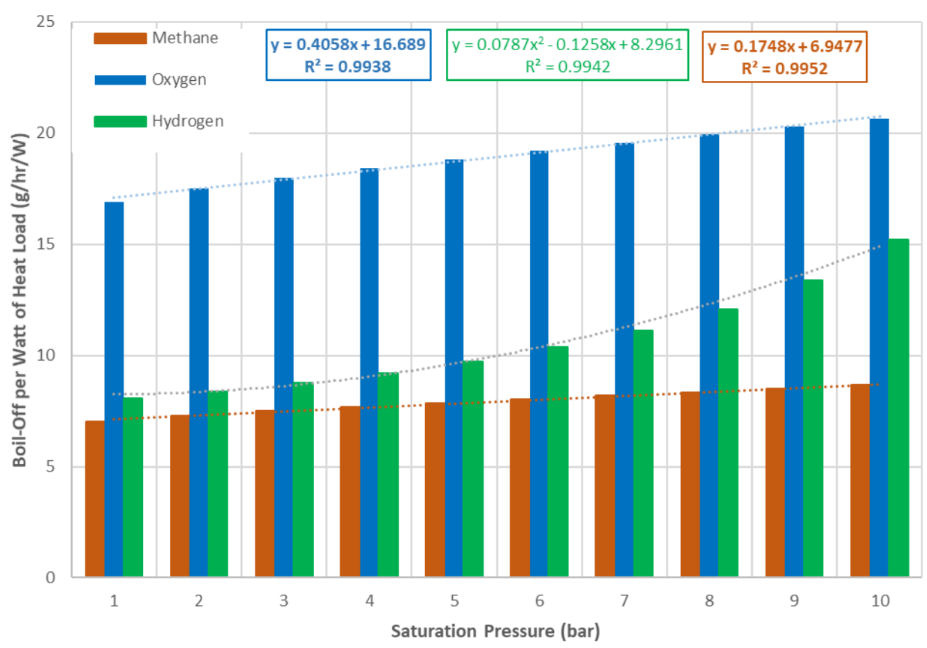

### Interface Shape

**Bond number, interface shape, and propellant settling in low earth orbit**

For the tank, fluid and conditions described in the previous example, what is the Bond
number if the tank is half full by volume? If the tank is at a higher fill level so that the free
surface diameter is 0.6 m (assuming a flat interface), what is the Bond number? What
interface shape would be expected under both these conditions? What are the CFM
operational implications?

In [7]:
import CoolProp.CoolProp as cp
import CryoFM

st = 'surface_tension'
radius_fs = [3.3, 0.3]
for x in radius_fs:
    bond = CryoFM.bond(accel=9.81e-6, radius_fs = x, 
                    dens_liq=cp.PropsSI('D', 'P', 2e5, 'Q', 0, 'Oxygen'),
                    dens_vap=cp.PropsSI('D', 'P', 2e5, 'Q', 1, 'Oxygen'),
                    surf_tens=cp.PropsSI(st, 'P', 2e5, 'Q', 0, 'Oxygen'))
    print("For free surface radius of", x, "m, Bond number =", round(bond,1))

For free surface radius of 3.3 m, Bond number = 10.3
For free surface radius of 0.3 m, Bond number = 0.1
